In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from IPython.display import Image

#Estructurando un proyecto de Data Science

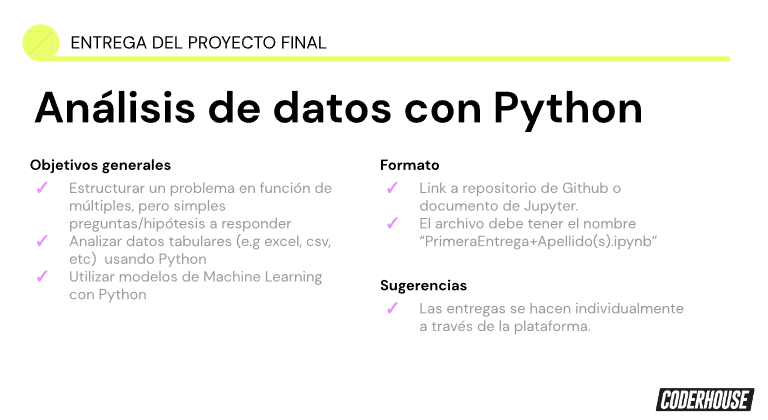

In [40]:
Image("/content/drive/MyDrive/DataScience/Sexta entrega/Screenshot_1.png")

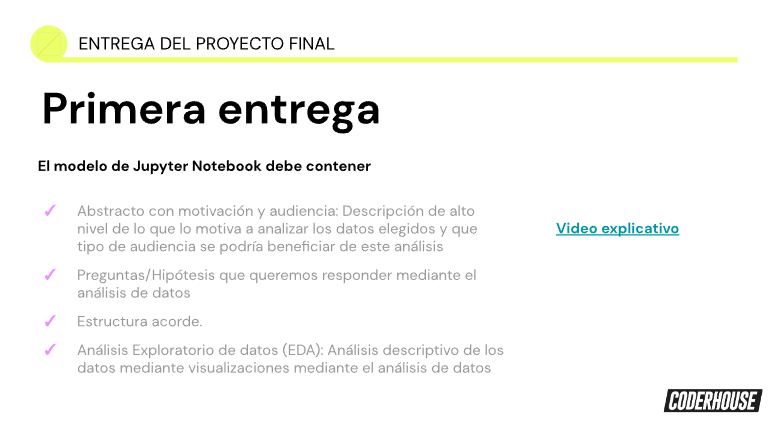

In [41]:
Image("/content/drive/MyDrive/DataScience/Sexta entrega/Screenshot_2.png")

#Abstract



En este proyecto, se abordará una investigación sobre las características que diferencian a los jugadores de Starcraft 2. El objetivo principal es identificar cuáles son los factores más relevantes a la hora de intentar mejorar y determinar cómo estos factores pueden ser aprovechados por los jugadores para lograr un desempeño más efectivo.

Además, se realizará una división por grupos de los distintos tipos de jugadores de Starcraft 2, identificando las fortalezas y debilidades de cada uno. Esta segmentación permitirá a los jugadores conocer mejor sus propias habilidades y limitaciones, y proporcionará una visión más clara sobre qué aspectos deben mejorar para lograr un desempeño más efectivo en el juego.

Este estudio será de gran utilidad para todos los jugadores de Starcraft 2 que buscan mejorar su juego, ya que les proporcionará una comprensión más profunda de los factores clave que influyen en su rendimiento. Además, será útil para la empresa dueña del juego en caso de que busque hacer cambios dentro del mismo. 

En resumen, este proyecto busca investigar de manera exhaustiva las características que diferencian a los jugadores de Starcraft 2, identificar los factores clave que influyen en su desempeño y proporcionar información valiosa tanto para los jugadores como para la empresa dueña del juego.

#Introduccion

Para lograr el cometido se comenzara con un breve analisis exploratorio de los datos, luego se plantearan algunas preguntas clave y se intentaran responder con los datos disponibles y para finalizar se pondra a prueba un modelo de clasificacion.

Para el EDA se seguira la siguiente guia de preguntas sobre los datos en si:

1-¿Cual es el tamaño del dataset?¿Es lo suficientemente grande para someterse a un analisis?

2-¿Cuáles son las variables presentes en los datos y cuál es su tipo (numérico, categórico, etc.)?

3-¿Hay valores faltantes en los datos?

4-¿Hay valores duplicados en los datos?

5-¿Hay outliers en los datos?

Las preguntas que se le haran a los datos para conseguir algunas respuestas son las siguientes:

1-¿Que porcentaje de nuestra base de datos de jugadores se encuentra en cada division?¿Es representativo de la realidad?

2-Los jugadores con mas tiempo de juego ¿Suelen ser mejores?

3-¿Cual es el rango de edades de los jugadores? ¿Hay un publico predilecto?

4-La edad del jugador, ¿tiene un impacto en su desempeño?



#Desarrollo

Se comienza importando los datos y se procedera a responder las preguntas listadas anteriormente.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
data_skillcraft = pd.read_csv(r'/content/drive/MyDrive/DataScience/Segunda entrega/SkillCraft.csv', delimiter = ",")

In [26]:
data_skillcraft.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


Respondiendo a la primer pregunta veamos el tamaño de nuestro dataset

In [27]:
data_skillcraft.shape

(3338, 20)

Podemos observar que tenemos 20 variables distintas y mas de 3300 registros, lo cual es suficiente para someterse a analisis

Ahora se observara cuales son estas variables y de que tipo son.

In [28]:
data_skillcraft.dtypes

GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

Se observa que todos los datos que tenemos son de valores numericos, aproximadamente la mitad de valores enteros y la mitad de valores reales.


Continuando con las preguntas veremos si hay datos faltantes

In [29]:
data_skillcraft.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

Afortunadamente nuestro dataset no tiene datos faltantes, ahora veamos si hay datos repetidos.


In [30]:
data_skillcraft.drop_duplicates(inplace=True)

data_skillcraft.shape


(3338, 20)

Vemos que la cantidad de registros sigue siendo la misma, por lo que no habia datos duplicados en el dataset

Ahora se analizara la existencia de outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


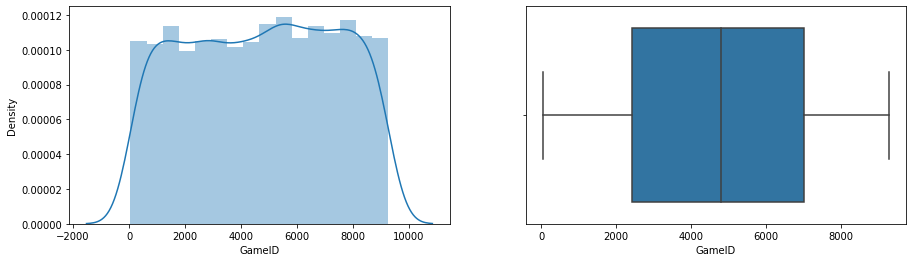

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


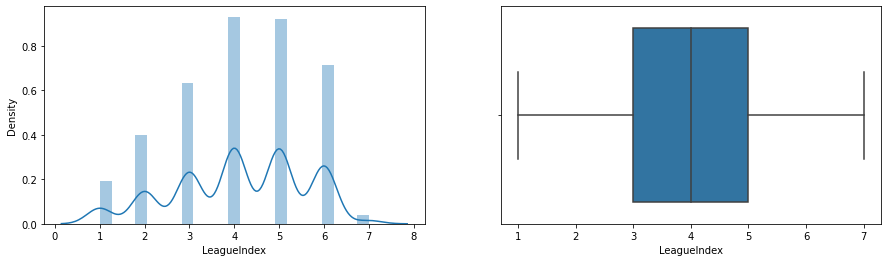

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


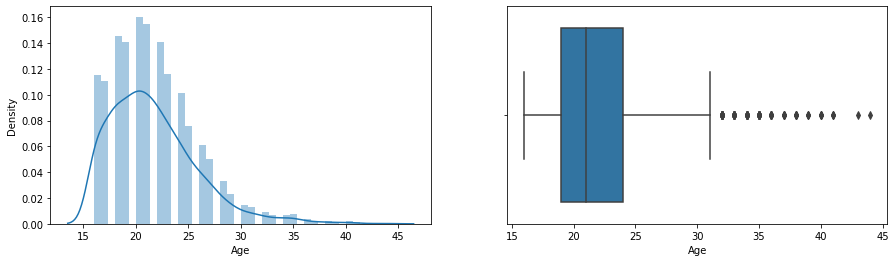

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


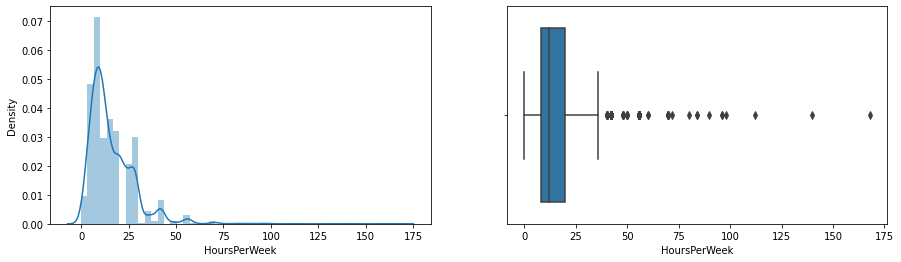

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


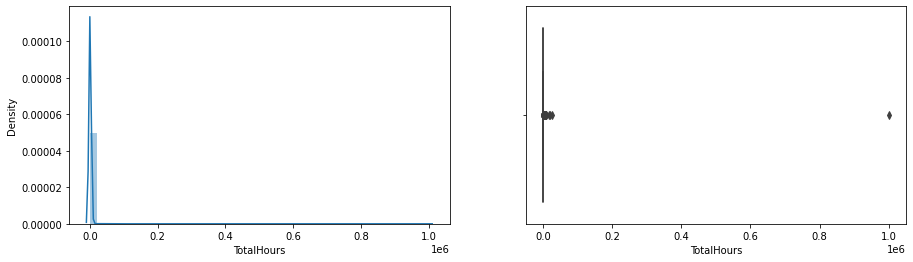

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


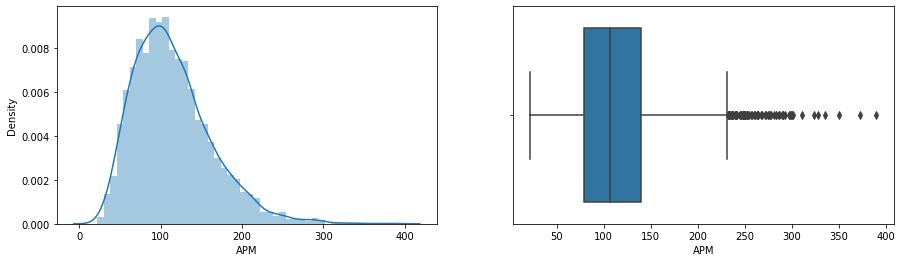

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


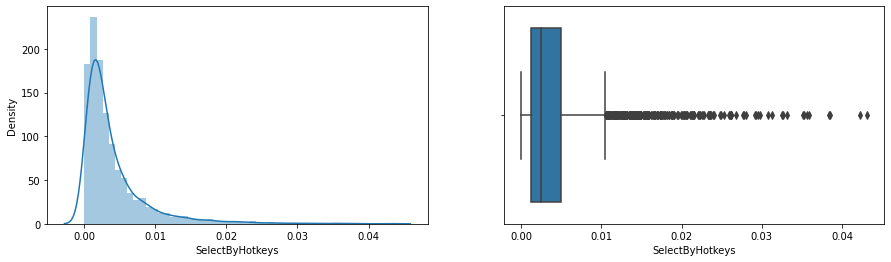

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


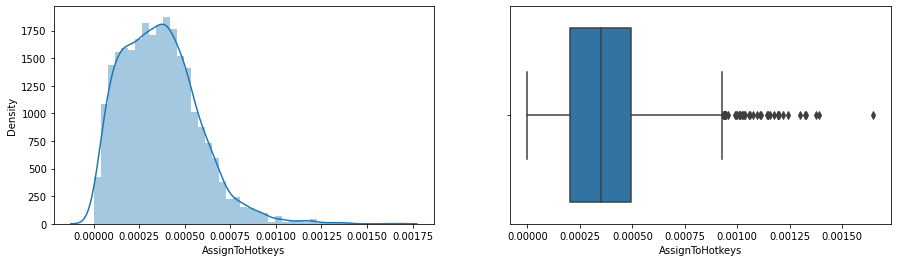

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


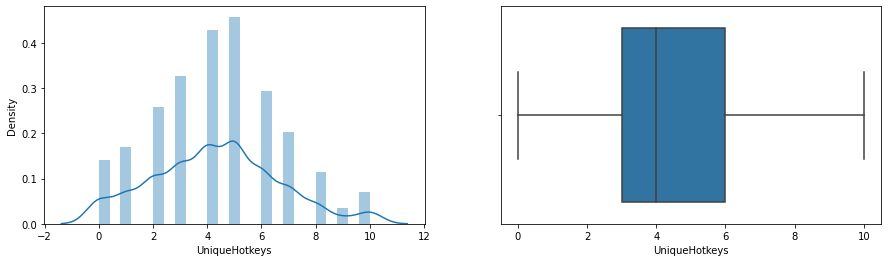

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


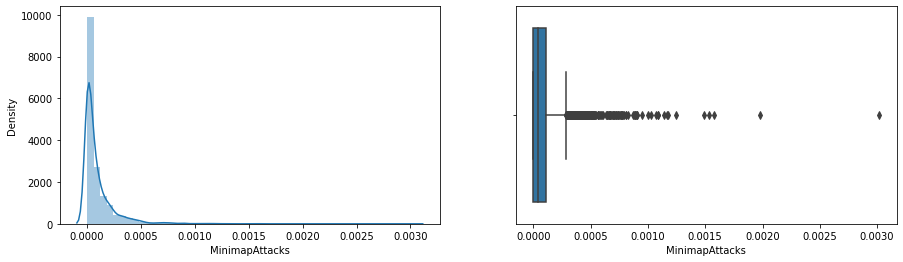

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


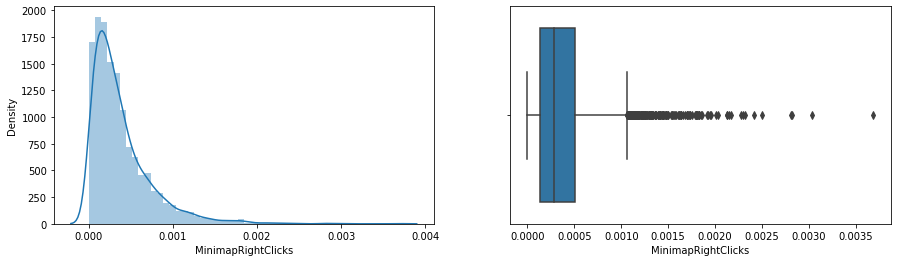

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


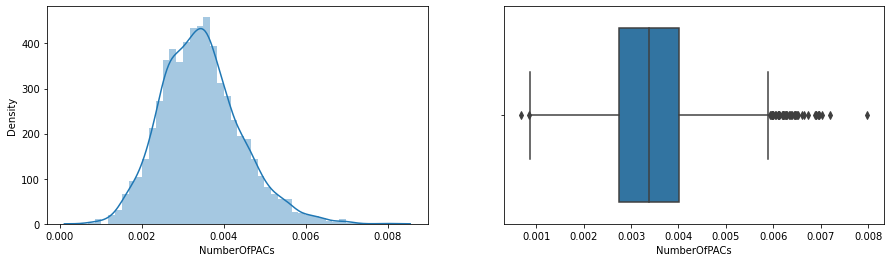

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


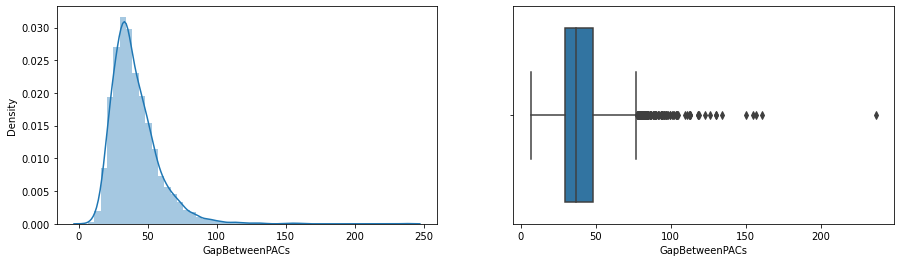

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


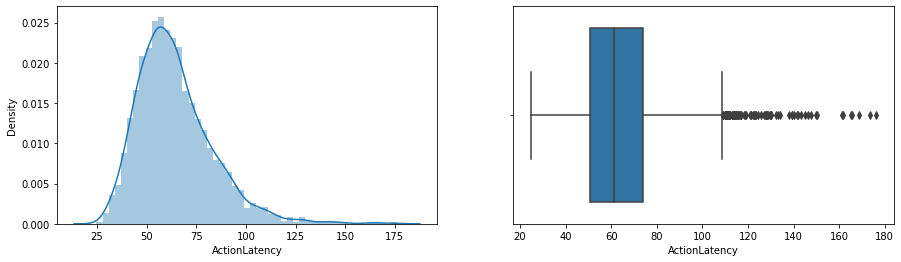

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


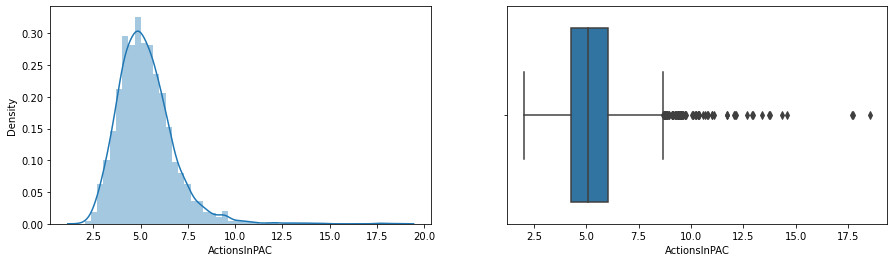

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


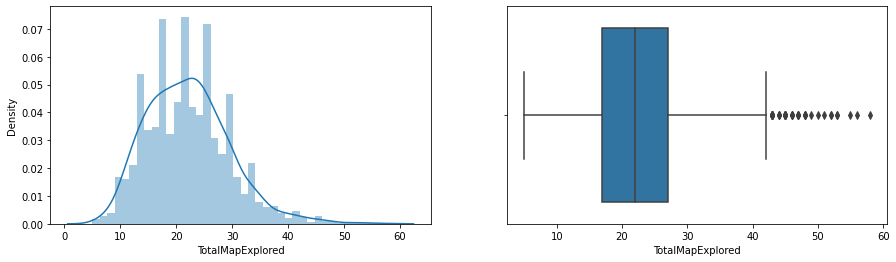

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


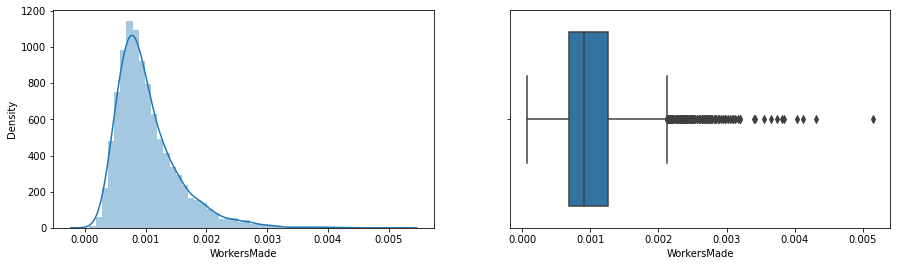

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


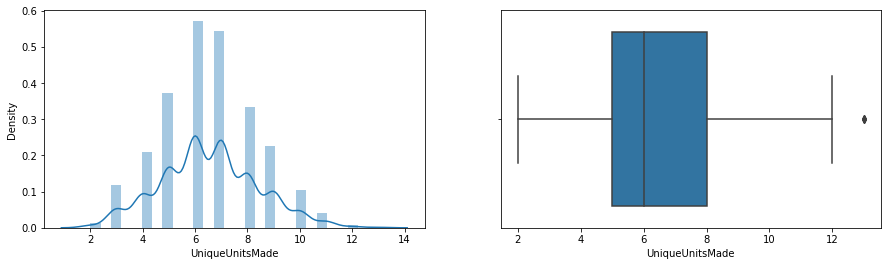

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


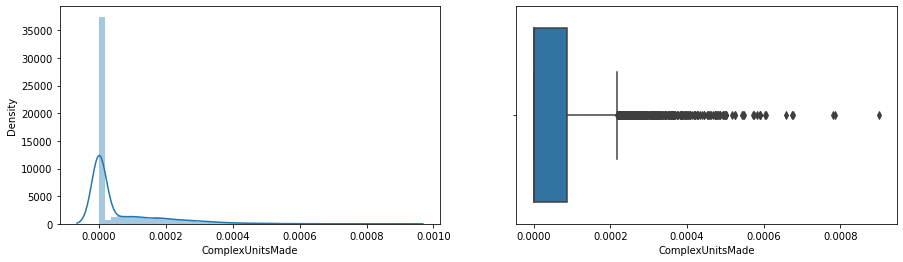

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


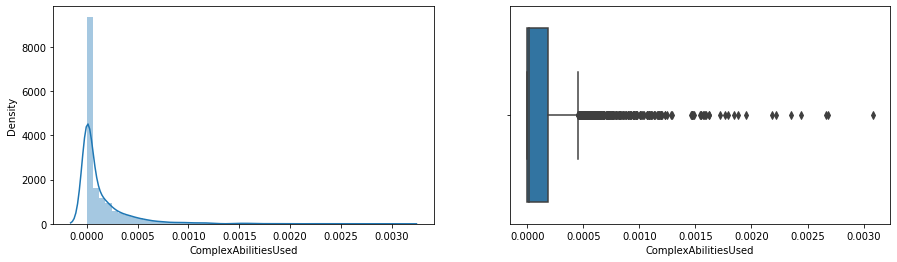

In [31]:
columns = list(data_skillcraft.columns)

for col in columns:
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(data_skillcraft[col], ax=ax[0])
    ax[1] = sns.boxplot(data_skillcraft[col], ax=ax[1])
    plt.show()

Sin tener en cuenta las variables el GameID (que tiene un valor unico para cada dato) y el LeagueIndex (que tienen valores de 0 a 7) podemos observar una alta prescencia de outliers, por lo que seran algo a tener en cuenta a la hora de trabajar con un modelo.

Ahora se continuara con una breve obtencion de insights sobre el perfil de los jugadores de nuestro dataset

Comenzaremos viendo el porcentaje de jugadores que hay en cada division.

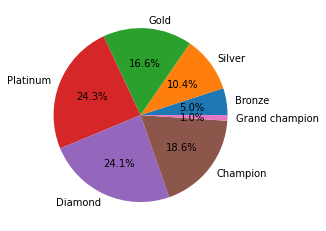

In [32]:
amount_players = []
i=1

while i<=7:
    amount_players.append(data_skillcraft["LeagueIndex"].value_counts()[i])
    i += 1

division = ["Bronze", "Silver", "Gold", "Platinum", "Diamond", "Champion", "Grand champion"]

plt.pie(amount_players, labels=division, autopct = "%0.1f%%")
plt.show()

En este grafico se puede observar que porcentaje del dataset esta en cada una de las divisiones, aunque no necesariamente es representativo de la realidad, mirando fuentes oficiales encontramos esta tabla:

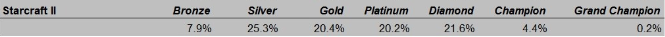

In [33]:
Image("/content/drive/MyDrive/DataScience/Segunda entrega/Screenshot_2.png")

Podemos ver que nuestro dataset tiene un sesgo hacia los jugadores de mayor habilidad, esto puede deberse entre otras cosas a que es mas probable que estos jugadores usen aplicaciones de terceros para monitorear sus estadisticas y estas son las que conseguimos en nuestro dataset.

Lo siguiente que se analizara sera la dedicacion de los jugadores en cada division, es decir, cuantas horas juegan por semana.



/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Horas')

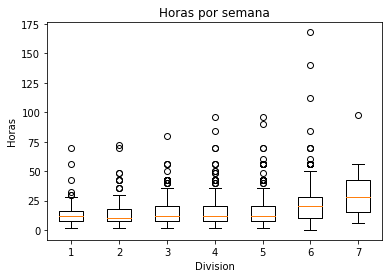

In [34]:
hours = []
i=1

while i<=7:
    string = "LeagueIndex =="+str(i)
    hours.append(data_skillcraft.query(string)["HoursPerWeek"])
    i +=1

fig, ax = plt.subplots()
ax.boxplot(hours)
ax.set_title("Horas por semana")
ax.set_xlabel("Division")
ax.set_ylabel("Horas")

Se puede observar un leve pero claro aumento de las horas a medida que se avanza de division, lo que nos indica que a medida que mas tiempo le dedica un jugador por semana suele obtener mejores resultados.

Para cerrar con este breve analisis veremos la edad de los jugadores de starcraft 2.

In [35]:
print(data_skillcraft["Age"].min())
print(data_skillcraft["Age"].max())

16
44


In [36]:
x = np.arange(16,45)

In [37]:
y = []

for i in x:
    try:
        y.append(data_skillcraft["Age"].value_counts()[i])
    except KeyError:
        y.append(0)

Text(0.5, 0, 'Edad')

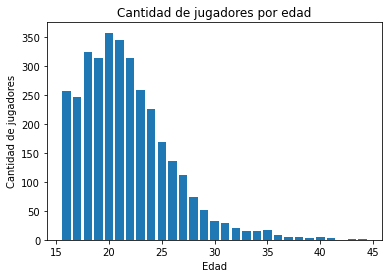

In [38]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title("Cantidad de jugadores por edad")
ax.set_ylabel("Cantidad de jugadores")
ax.set_xlabel("Edad")

Podemos observar como la mayor densidad de jugadores en nuestro dataset esta al rededor de los 20 años y decae hacia ambos lados. Tenemos una distribucion normal con sesgo hacia la izquierda.

Ahora se vera si la edad de los jugadores es un factor a teener en cuenta en su desempeño.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Edad')

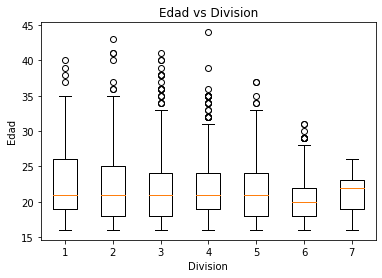

In [39]:
age = []
i=1

while i<=7:
    string = "LeagueIndex =="+str(i)
    age.append(data_skillcraft.query(string)["Age"])
    i +=1

fig, ax = plt.subplots()
ax.boxplot(age)
ax.set_title("Edad vs Division")
ax.set_xlabel("Division")
ax.set_ylabel("Edad")

Podemos observar como a medida que avanzamos en las divisiones hay un decremento de la edad, esto podria deberse a factores de la edad, como perdida de reflejos y dificultad para adaptarse o aprender cosas nuevas, pero tambien podria deberse a factores externos a la persona como tener menos tiempo para practicar debido a un trabajo o tener familia e hijos.

Tambien si comparamos la division de master con la de grand master, podemos observar como hay un aumento de edad, esto puede deberse a que los jugadores de grand master, al ser mayores (pero sin llegar a una adultez completa), llevan mas tiempo en el juego dedicandole muchas horas lo que implica mas experiencia en el mismo. Es posible que en unos años, los actuales jugadores que se encuentran en grand master no puedan dedicarle tanto tiempo al juego y caigan de division, mientras que los que ahora estan en master ocupan ese lugar.